In [1]:
!pip install kaggle

In [1]:
import os



userkaggle       = 'xxxxx'
passkaggle       = 'yyyyy'

try :
    os.environ['KAGGLE_USERNAME'] = userkaggle
    os.environ['KAGGLE_KEY'] = passkaggle
except :
    print("KAGGLE_USERNAME or KAGGLE_KEY is not set.")
   

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils 

In [3]:
import os
from IPython.display import clear_output

if not os.path.exists('animal-faces.zip'):
    # Download the dataset
    !kaggle datasets download -d andrewmvd/animal-faces    

if os.path.exists('animal-faces.zip') and not os.path.exists('animal-faces'):
    # Make directory and unzip
    !unzip animal-faces.zip -d animal-faces
    clear_output()


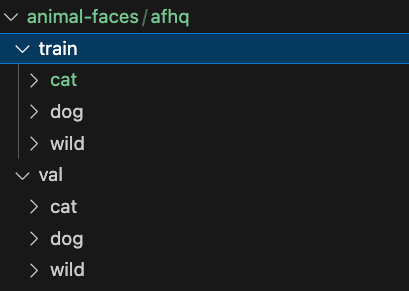

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory containing the images
path = './animal-faces'

# Get a list of all image files with the .jpg extension
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

print('Number of images found:', len(image_files))

Number of images found: 16130


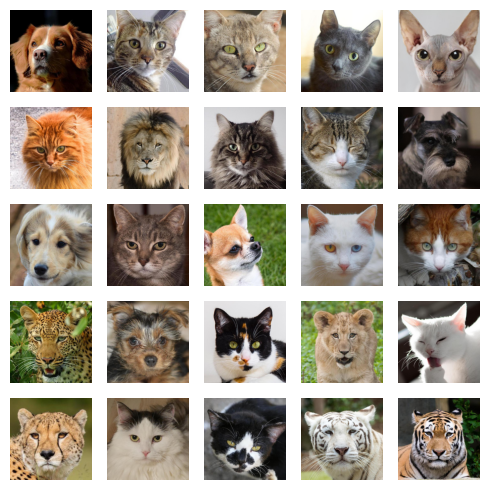

In [6]:
import random
# Randomly sample 8x8 images
sample_images = random.sample(image_files, 25)

# Display the sample grid image with 8x8 layout
fig, axs = plt.subplots(5, 5, figsize=(5, 5))
for i, ax in enumerate(axs.flatten()):
    img = mpimg.imread(sample_images[i])
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Dataloaders without transforms

In [14]:
import glob
import os
import pandas as pd

train_path = 'animal-faces/afhq/train'

# Get all image paths using glob
image_paths = glob.glob(os.path.join(train_path, '*', '*.jpg'))

# Extract class labels from image paths
class_labels = [os.path.basename(os.path.dirname(path)) for path in image_paths]

# Create a dictionary to map class labels to numeric values
class_mapping = {label: i for i, label in enumerate(set(class_labels))}

# Add a new column 'class_id' to the dataframe with the mapped values
df['class_id'] = df['class'].map(class_mapping)

df


,class,path,class_id
0,cat,animal-faces/afhq/train/cat/pixabay_cat_004530...,1
1,cat,animal-faces/afhq/train/cat/flickr_cat_000005.jpg,1
2,cat,animal-faces/afhq/train/cat/pixabay_cat_001291...,1
3,cat,animal-faces/afhq/train/cat/pixabay_cat_003589...,1
4,cat,animal-faces/afhq/train/cat/pixabay_cat_004287...,1
...,...,...,...
14625,dog,animal-faces/afhq/train/dog/pixabay_dog_000514...,0
14626,dog,animal-faces/afhq/train/dog/pixabay_dog_001963...,0
14627,dog,animal-faces/afhq/train/dog/flickr_dog_000020.jpg,0
14628,dog,animal-faces/afhq/train/dog/pixabay_dog_002936...,0


In [20]:
from PIL import Image

class MyDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Get the data at the specified index
        data = self.df.iloc[idx]

        # Extract the features and label from the data
        path = data['path']
        label = data['class_id']

        # Read the image from the path
        image = Image.open(path)

        # Apply the custom transform if provided
        if self.transform:
            image = self.transform(image)

        # Return the image and label as tensors
        return image, label



In [21]:
custom_transform = transforms.Compose([
    transforms.Resize(300),  # Resize the image to (300, 300)
    transforms.RandomRotation(50),  # Randomly rotate the image by 50 degrees
    transforms.CenterCrop(500),  # Crop the image to (500, 500) at the center
    transforms.RandomVerticalFlip(),  # Randomly flip the image vertically
    transforms.ToTensor(),  # Convert the image to a tensor
])

# Create an instance of the dataset with the custom transform
dataset = MyDataset(df, transform=custom_transform)
# Create a dataloader for the dataset
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


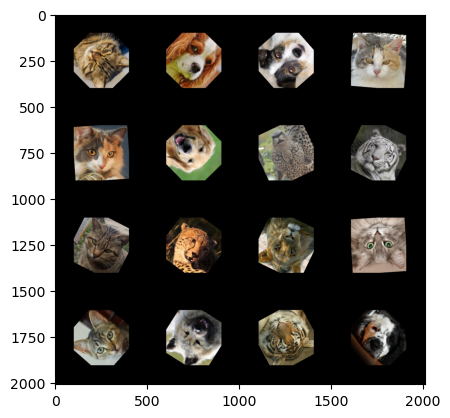

In [24]:
# %%
def imshow(image_torch): 
    # flip image channels to RGB
    image_torch = image_torch.numpy().transpose((1, 2, 0)) 
    plt.figure() 
    plt.imshow(image_torch) 
 
X_train, y_train = next(iter(dataloader)) 
image_grid = torchvision.utils.make_grid(X_train[:16, :, :, :], scale_each= True, nrow=4) 
imshow(image_grid) 